In [1]:
import pandas as pd

In [2]:
cctv_seoul = pd.read_csv("C:\\Users\\yjy99\\Desktop\\Python\\Python_sync\\파이썬 머슬캠프\\DataFile\\data\\01. CCTV_in_Seoul.csv", encoding = "UTF-8")
# 현재 디렉터리의 상위 디렉터리 = ../ 로 표시.
cctv_seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [3]:
cctv_seoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [4]:
cctv_seoul.rename(columns = {cctv_seoul.columns[0] : "구"}, inplace = True)
# inplace는 표를 이루는 값을 객체 내에서 변경하고 싶을 때 True로 사용함.
cctv_seoul.head()

,구,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [5]:
pop_seoul = pd.read_excel("C:\\Users\\yjy99\\Desktop\\Python\\Python_sync\\파이썬 머슬캠프\\DataFile\\data\\01. population_in_Seoul.xls", encoding = "UTF-8")
pop_seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017.1/4,합계,4202888,10197604,5000005,5197599,9926968,4871560,5055408,270636,128445,142191,2.36,1321458
3,2017.1/4,종로구,72654,162820,79675,83145,153589,75611,77978,9231,4064,5167,2.11,25425
4,2017.1/4,중구,59481,133240,65790,67450,124312,61656,62656,8928,4134,4794,2.09,20764


In [6]:
pop_seoul = pd.read_excel("C:\\Users\\yjy99\\Desktop\\Python\\Python_sync\\파이썬 머슬캠프\\DataFile\\data\\01. population_in_Seoul.xls",
                          header = 2,
                          usecols = "B, D, G, J, N",
                          encoding = "UTF-8")
# header 변수를 지정하면 해당하는 인덱스를 가진 행을 제목으로 사용하고, 그 다음 행부터는 표의 내용으로 사용함.
pop_seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [7]:
pop_seoul.rename(columns = {pop_seoul.columns[0] : "구",
                            pop_seoul.columns[1] : "인구 수",
                            pop_seoul.columns[2] : "한국인",
                            pop_seoul.columns[3] : "외국인",
                            pop_seoul.columns[4] : "고령자"}, inplace = True)
pop_seoul.head()

,구,인구 수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [8]:
cctv_seoul.head()

,구,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [9]:
cctv_seoul.sort_values(by = "소계", ascending = True).head()  # 내림차순 정렬

,구,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,485,238,159,42,386
12,마포구,574,314,118,169,379
17,송파구,618,529,21,68,463
24,중랑구,660,509,121,177,109
23,중구,671,413,190,72,348


In [10]:
cctv_seoul.sort_values(by = "소계", ascending = False).head()  # 오름차순 정렬

,구,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
18,양천구,2034,1843,142,30,467
14,서초구,1930,1406,157,336,398
21,은평구,1873,1138,224,278,468
20,용산구,1624,1368,218,112,398


In [11]:
cctv_seoul["최근증가율"] = (cctv_seoul["2016년"] + cctv_seoul["2015년"] +
                       cctv_seoul["2014년"]) / cctv_seoul["2013년도 이전"] * 100
cctv_seoul.sort_values(by = "최근증가율", ascending = False).head(5)

,구,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765


In [12]:
pop_seoul.head()

,구,인구 수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [13]:
pop_seoul.drop([0], inplace = True)  # 값을 지울 때에는 drop 메소드 사용. 값을 변경할 때는 항상 inplace = True.
pop_seoul.head()

,구,인구 수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [14]:
pop_seoul["구"].unique()  # 중복된 값이 있으면 하나만 출력하고, 하나 이상의 서로 다른 값들은 리스트로 만들어 출력한다.

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan],
      dtype=object)

In [15]:
pop_seoul[pop_seoul["구"].isnull()]  # isnull()로 null 값의 위치를 알아냄. 위 리스트의 마지막에 있는 nan이 null 값.

,구,인구 수,한국인,외국인,고령자
26,NaN,NaN,NaN,NaN,NaN


In [16]:
pop_seoul.drop([26], inplace = True)
pop_seoul.head()

,구,인구 수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [17]:
pop_seoul["외국인비율"] = pop_seoul["외국인"] / pop_seoul["인구 수"] * 100
pop_seoul["고령자비율"] = pop_seoul["고령자"] / pop_seoul["인구 수"] * 100
pop_seoul.head()

,구,인구 수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


In [18]:
pop_seoul.sort_values(by = "고령자", ascending = False).head()

,구,인구 수,한국인,외국인,고령자,외국인비율,고령자비율
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
12,은평구,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [19]:
pop_seoul.sort_values(by = "고령자비율", ascending = False).head()

,구,인구 수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
13,서대문구,327163.0,314982.0,12181.0,48161.0,3.723221,14.720797


    pop_seoul.sort_values(by = "고령자비율", ascending = False).head(5)
**_by = "정렬 기준으로 사용할 값"_**

## 2일차

In [20]:
data_result = pd.merge(cctv_seoul, pop_seoul, on = "구")
data_result.head()

,구,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구 수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [21]:
del data_result["2013년도 이전"]
del data_result["2014년"]
del data_result["2015년"]
del data_result["2016년"]
# 열을 삭제할 때는 del, 행을 삭제할 때는 drop 사용

data_result.head()

,구,소계,최근증가율,인구 수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [22]:
data_result.set_index("구", inplace = True)  # 기존에 설정한 index = [0, 1, 2, ..., 11]를 "구"에 해당하는 열의 값으로 대치.
data_result.head()

,소계,최근증가율,인구 수,한국인,외국인,고령자,외국인비율,고령자비율
구,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


------
------

In [23]:
import numpy as np

In [24]:
np.corrcoef(data_result["고령자비율"], data_result["소계"])

array([[ 1.        , -0.28078554],
       [-0.28078554,  1.        ]])

In [25]:
np.corrcoef(data_result["외국인비율"], data_result["소계"])

array([[ 1.        , -0.13607433],
       [-0.13607433,  1.        ]])

In [26]:
np.corrcoef(data_result["인구 수"], data_result["소계"])

array([[1.        , 0.30634228],
       [0.30634228, 1.        ]])

**<상관계수>**

    np.corrcoef(data_result["인구 수"], data_result["소계"]) == 상관계수를 행렬로 출력하는 함수
    
    array([[1.        , 0.30634228],  
           [0.30634228, 1.        ]])
          
np.corrcoef()의 출력에서 오른쪽 위의 0.30634228이 상관계수이다.

상관계수는 두 데이터 사이의 관련성을 수치적으로 나타내는 것이다.  
0.0 이하면 무시해도 되는 수준의 관련성을 의미하고,  
0.3 이면 약한 상관관계가 있음을 의미하며,  
0.7 이상이면 강한 상관관계가 있음을 의미한다.

------
------

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

In [28]:
t = np.arange(0, 12, 0.01)  # arnage(a, b, c)는 a부터 b 사이의 값을 c만큼 바꾼 결과에 대한 행렬을 반환한다.
y = np.sin(t)

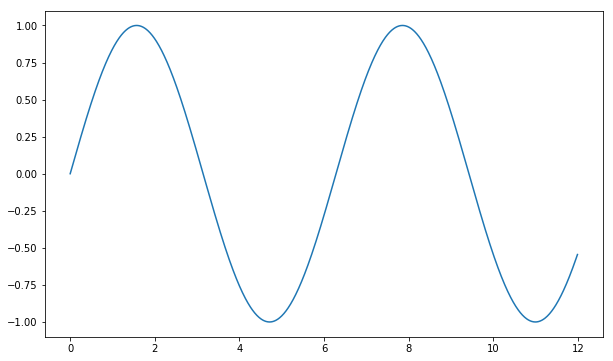

In [29]:
plt.figure(figsize = (10, 6))  # figsize = (a, b)는 x축으로 a만큼, y축으로 b만큼의 크기를 갖는 그래프를 그린다는 의미이다.
plt.plot(t, y)
plt.show()

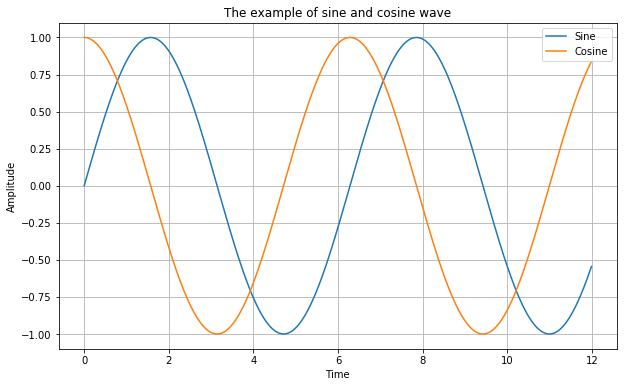

In [30]:
plt.figure(figsize = (10, 6))

plt.plot(t, np.sin(t), label = "Sine")
plt.plot(t, np.cos(t), label = "Cosine")

plt.legend()

plt.grid()  # 좌표계 그리드 표시

plt.xlabel("Time")  # x축 이름 표시
plt.ylabel("Amplitude")  # y축 이름 표시

plt.title("The example of sine and cosine wave")  # 그래프 제목 표시

plt.show()

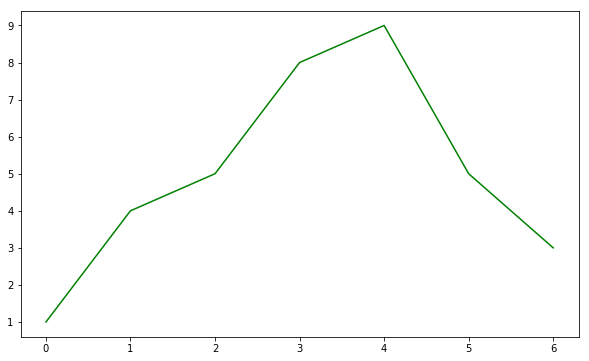

In [31]:
t = [0, 1, 2, 3, 4, 5, 6]
y = [1, 4, 5, 8, 9, 5, 3]

plt.figure(figsize = (10, 6))

plt.plot(t, y, color = "green")

plt.show()

In [32]:
t = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([9, 8, 7, 9, 8, 3, 2, 4, 3, 4])

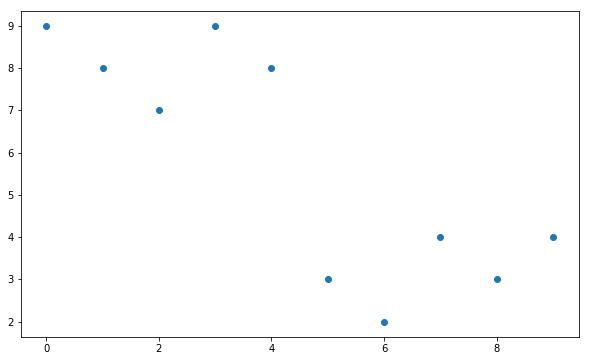

In [33]:
plt.figure(figsize = (10, 6))

plt.scatter(t, y)  # 분산형 차트로 표시

plt.show()

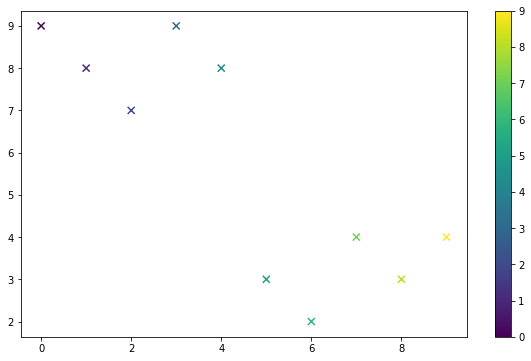

In [34]:
colormap = t

plt.figure(figsize = (10, 6))

plt.scatter(t, y, s = 50, c = colormap, marker = "x")  # marker = x, p, >, <, o 등을 사용 가능

plt.colorbar()  # 색상표 사용

plt.show()

In [35]:
s1 = np.random.normal(loc = 0, scale = 1, size = 1000)
s2 = np.random.normal(loc = 5, scale = 0.5, size = 1000)
s3 = np.random.normal(loc = 10, scale = 2, size = 1000)

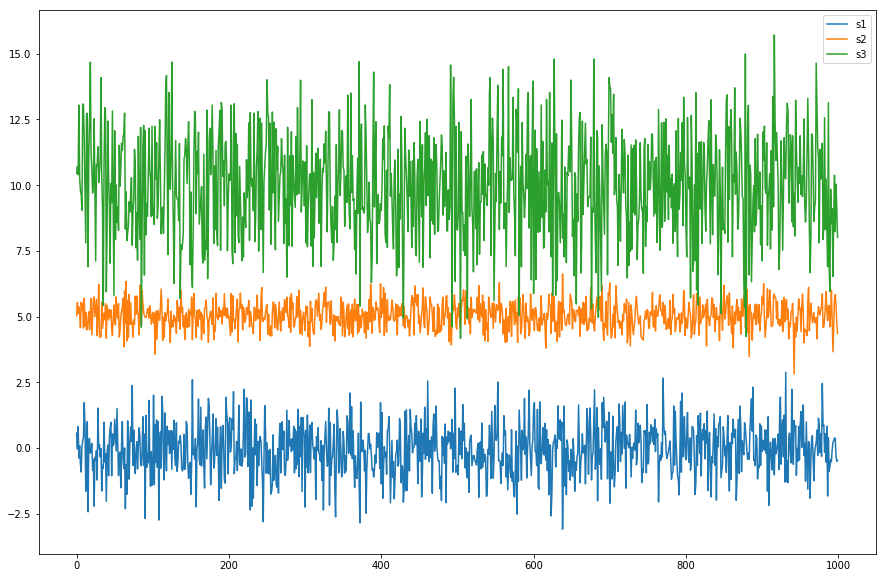

In [36]:
plt.figure(figsize = (15, 10))

plt.plot(s1, label = "s1")
plt.plot(s2, label = "s2")
plt.plot(s3, label = "s3")

plt.legend()

plt.show()

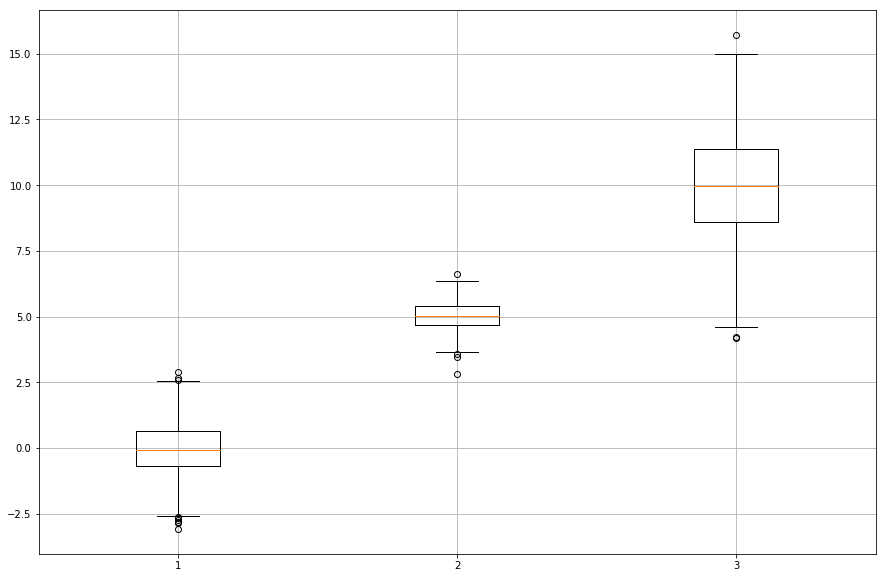

In [37]:
plt.figure(figsize = (15, 10))

plt.boxplot((s1, s2, s3))

plt.grid()

plt.show()

In [38]:
import platform

from matplotlib import font_manager, rc
plt.rcParams["axes.unicode_minus"] = False

if platform.system() == "Darwin":
    rc("font", family = "AppleGothic")
    
elif platform.system() == "Windows":
    path = "C:\\Windows\\Fonts\\서울한강체 B.ttf"
    font_name = font_manager.FontProperties(fname = path).get_name()
    rc("font", family = font_name)
    
else:
    print("Not available system")

In [39]:
data_result.head()

,소계,최근증가율,인구 수,한국인,외국인,고령자,외국인비율,고령자비율
구,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


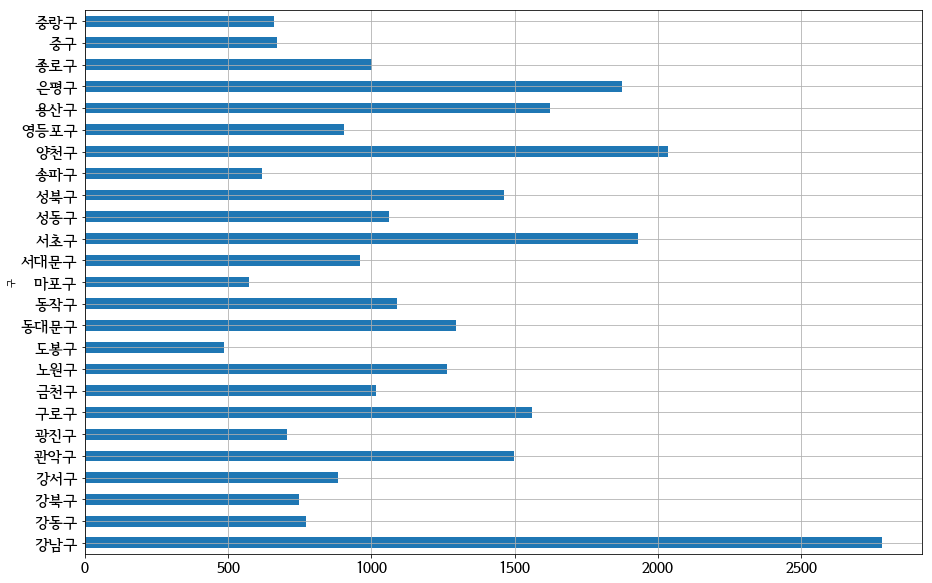

In [51]:
plt.figure()

data_result["소계"].plot(kind = "barh", grid = True, fontsize = 16, figsize = (15, 10))

plt.show()

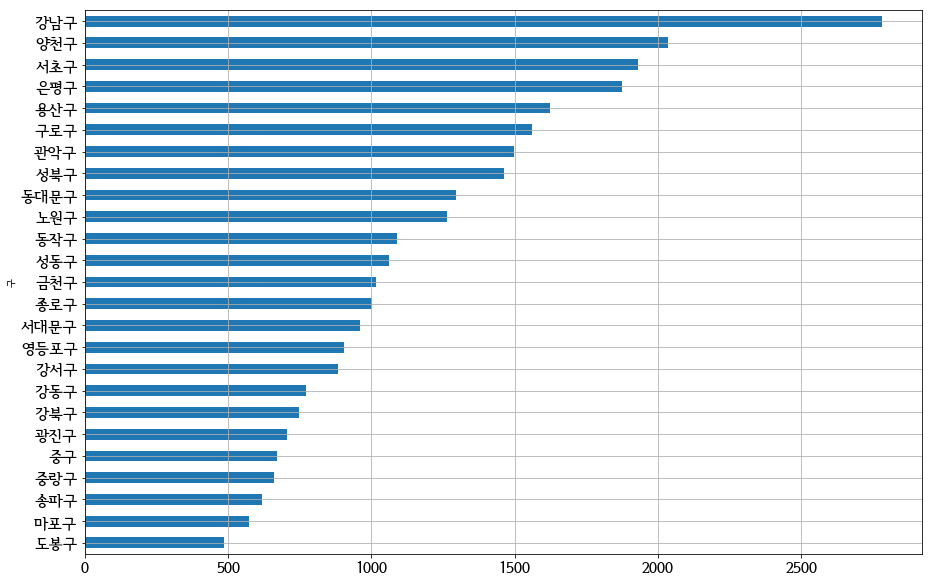

In [41]:
data_result["소계"].sort_values().plot(kind = "barh", grid = True, fontsize = 16, figsize = (15, 10))

plt.show()

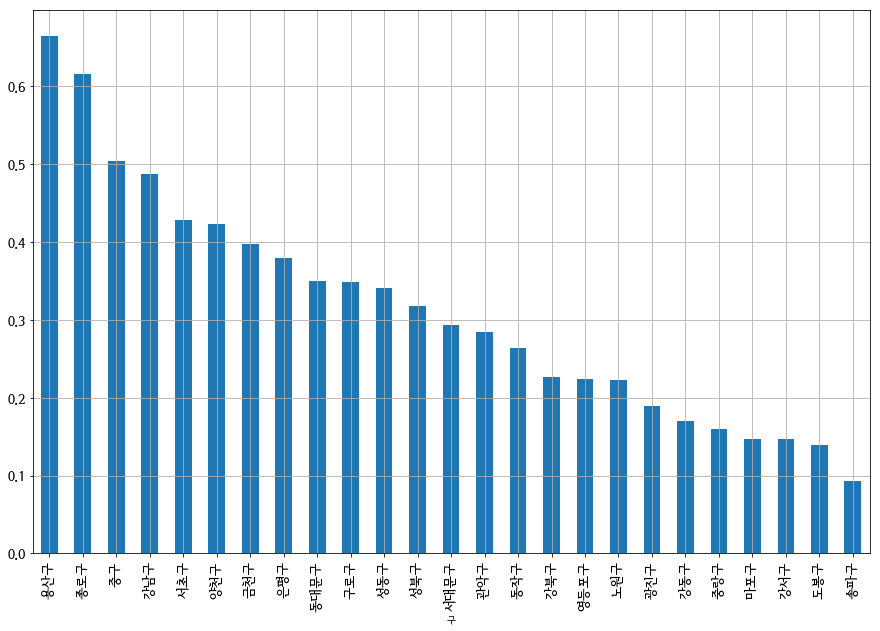

In [42]:
data_result["CCTV 비율"] = data_result["소계"] / data_result["인구 수"] * 100  # 데이터에 열 추가.

data_result["CCTV 비율"].sort_values(ascending = False).plot(kind = "bar", grid = True, fontsize = 14, figsize = (15, 10))  # 앞에서 추가한 열을 기준으로 정렬.

plt.show()

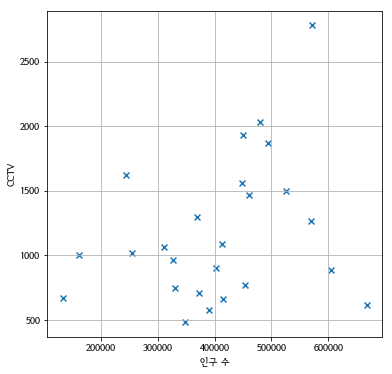

In [43]:
plt.figure(figsize = (6, 6))

plt.scatter(data_result["인구 수"], data_result["소계"], s = 35, marker = "x")  # marker = x, p, >, <, o 등을 사용 가능. s = 데이터 마커의 크기 조절.

plt.xlabel("인구 수")
plt.ylabel("CCTV")

plt.grid()

plt.show()

In [44]:
fp1 = np.polyfit(data_result["인구 수"], data_result["소계"], 1)  # 평균값을 나타내는 직선을 표시하는 함수.

fp1

array([1.30916415e-03, 6.45066497e+02])

In [45]:
f1 = np.poly1d(fp1)  # poly1d는 평균값을 찾아서 반환하는 명령어
fx = np.linspace(100000, 700000, 100)  # x축

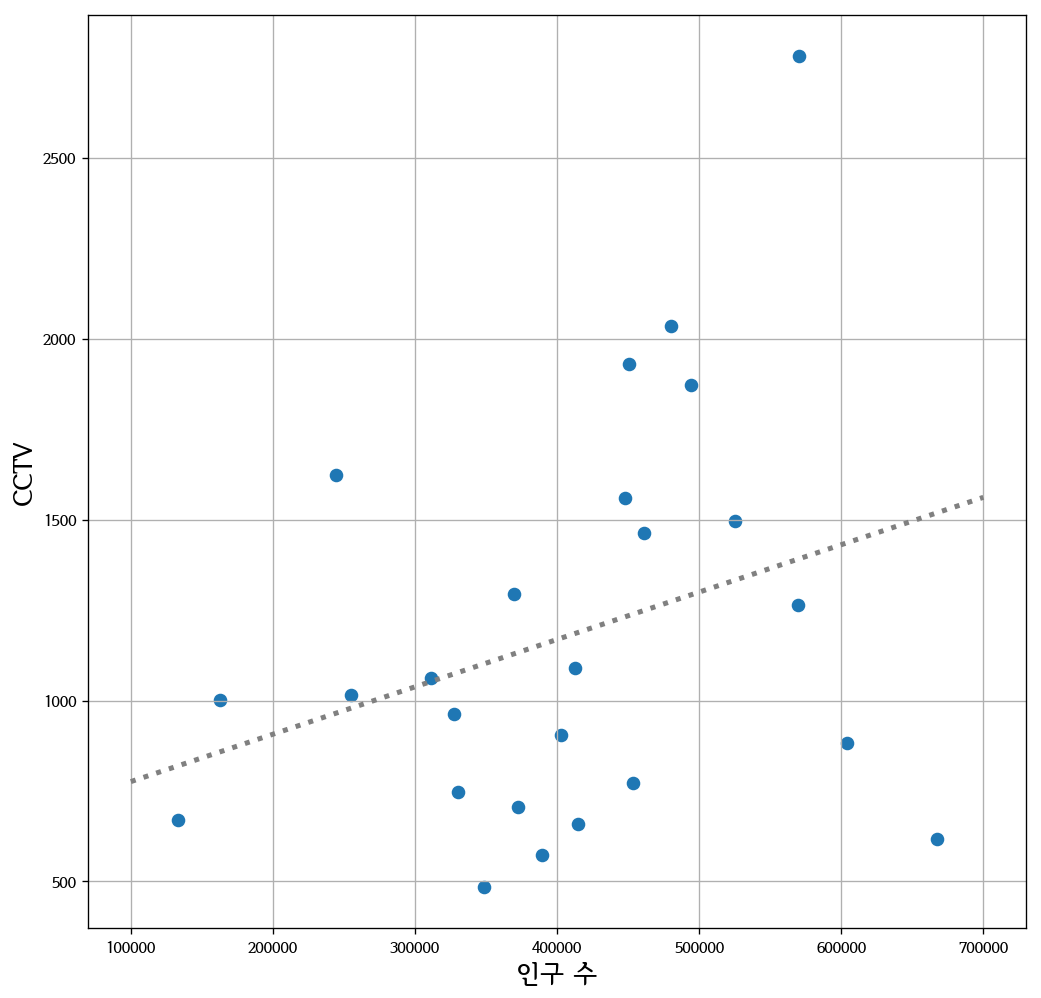

In [46]:
plt.figure(dpi = 121, num = 1, figsize = (10, 10))

plt.scatter(data_result["인구 수"], data_result["소계"], s = 50)

plt.plot(fx, f1(fx), ls = "dotted", lw = 3, color = "gray")

plt.xlabel("인구 수", fontsize = 16)
plt.ylabel("CCTV", fontsize = 16)

plt.grid()

plt.show()

In [47]:
fp1 = np.polyfit(data_result["인구 수"], data_result["소계"], 1)
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

data_result["오차"] = np.abs(data_result["소계"] - f1(data_result["인구 수"]))

df_sort = data_result.sort_values(by = "오차", ascending = 0)
df_sort.head()

,소계,최근증가율,인구 수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV 비율,오차
구,,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.487292,1388.055355
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599,0.092587,900.911312
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964,0.423769,760.563512
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308,0.428594,695.403794
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,0.665020,659.231690


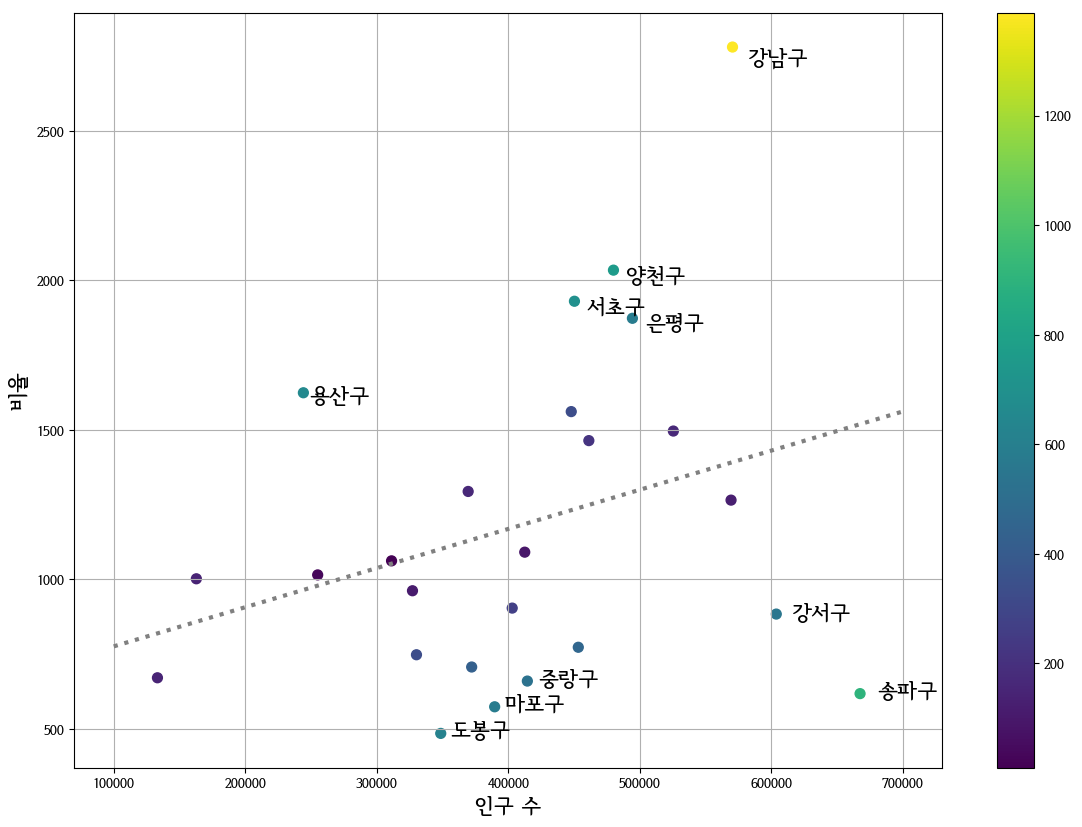

In [48]:
plt.figure(dpi = 100, figsize = (14, 10))

plt.scatter(data_result["인구 수"], data_result["소계"], c = data_result["오차"], s = 50)

plt.plot(fx, f1(fx), ls = "dotted", lw = 3, color = "gray")

for n in range(10):
    plt.text(df_sort["인구 수"][n] * 1.02, df_sort["소계"][n] * 0.98,
             df_sort.index[n], fontsize = 16)
    
plt.xlabel("인구 수", fontsize = 16)
plt.ylabel("비율", fontsize = 16)

plt.colorbar()
plt.grid()

plt.show()